(475, 1000)
(103, 195)
(163, 406)
(81, 185)
(128, 214)
NMI: 0.597847216544
0.447729423464


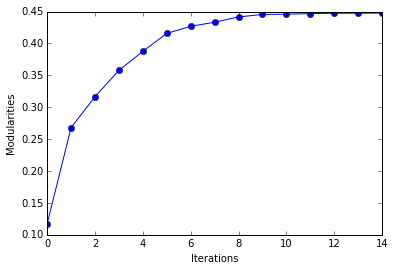

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.io import loadmat
from coclust.CoclustMod import CoclustMod

# Retrieve the CSTR  document-term matrix from a matlab file
file_name = "../datasets/cstr.mat"
matlab_dict = loadmat(file_name)
X = matlab_dict['fea']

print(X.shape)

# Create and fit a model with 4 co-clusters
model = CoclustMod(n_clusters=4)
model.fit(X)


# Use the computed and true row labels to compute the NMI
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
true_row_labels = matlab_dict['gnd'].flatten()
predicted_row_labels = model.row_labels_
print("NMI:" ,nmi(true_row_labels, predicted_row_labels))

# Plot modularities 
print(model.modularity)

plt.plot(model.modularities,marker='o')
plt.ylabel('Modularities')
plt.xlabel('Iterations')
plt.show()

